# ==== INTERACTIVE CLUSTERING : COMPUTATION TIME STUDY ====
> ### Stage 3 : Apply main effects and post-hoc analysis on interactive clustering computation times.

-----

## READ-ME BEFORE RUNNING

### Quick Description

This notebook is **aimed at run main effects and and post-hoc analysis on interactive clustering computation time over experiments**.
- Environments are represented by subdirectories in the `/experiments` folder. A full path to an experiment environment is `/experiments/[TASK]/[DATASET]/[ALGORITHM]/`.
- Experiments have to be run and evaluated in order to analyze convergency speed.

Before running, **run the notebook `2_Estimate_computation_time.ipynb` to run each algorithm you have set**.

Then, **go to the notebook `4_Plot_some_figures.ipynb` to create figures on interactive clustering computation time**.

### Description each steps

First of all, **load experiment synthesis CSV file** that have been computed with the last notebook.
- It contains parameters used for each experiment and convergency metric to compare.
- Several parameters are studied depending on the task:
    - _preprocessing_: `dataset_size`, `algorithm_name`;
    - _vectorization_: `dataset_size`, `algorithm_name`;
    - _sampling_: `dataset_size`, `algorithm_name`, `previous_nb_constraints`, `previous_nb_clusters`, `algorithm_nb_to_select`;
    - _clustering_: `dataset_size`, `algorithm_name`, `previous_nb_constraints`, `previous_nb_clusters`.
- Two random effects are used : `dataset_random_seed`, `algorithm_random_seed`.
- One values is modelized with these factors : `time_total`.

Then, for each task :
1. Ordinary Least Squares

-----

## 1. IMPORT PYTHON DEPENDENCIES

In [1]:
from typing import Dict, List, Optional, Tuple, Union
import numpy as np
import openpyxl
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from scipy import stats as scipystats
import statistics
import statsmodels.formula.api as smf

-----

## 2.1. ANALYSIS FOR PREPROCESSING

> - algorithms: `simple_prep`, `lemma_prep`, `filter_prep`
> - factors: `dataset_size`

In [2]:
df_preprocessing = pd.read_csv("../results/experiments_synthesis_for_preprocessing.csv", sep=";")
df_preprocessing["time_total"] = df_preprocessing["time_total"].str.replace(",", ".").astype(float)
df_preprocessing.head()

,Unnamed: 0,dataset_name,dataset_size,dataset_random_seed,algorithm_name,algorithm_random_seed,time_start,time_stop,time_total
0,../experiments/preprocessing/bank_cards_v2-siz...,bank_cards_v2,1000,1,filter_prep,1,1668606138,1668606148,10.645489
1,../experiments/preprocessing/bank_cards_v2-siz...,bank_cards_v2,1000,1,filter_prep,2,1668606138,1668606148,10.604682
2,../experiments/preprocessing/bank_cards_v2-siz...,bank_cards_v2,1000,1,filter_prep,3,1668606148,1668606155,6.896929
3,../experiments/preprocessing/bank_cards_v2-siz...,bank_cards_v2,1000,1,filter_prep,4,1668606148,1668606155,6.832410
4,../experiments/preprocessing/bank_cards_v2-siz...,bank_cards_v2,1000,1,filter_prep,5,1668606148,1668606155,6.849232


Ordinary Least Squares model

to dertermine if preprocessing computation time is `algorithm_name` dependant.

In [3]:
# Fit the model to the data and print results.
model_prep_ALGONAME = smf.ols(
    formula="time_total ~ C(algorithm_name)",
    data=df_preprocessing,
)
results_prep_ALGONAME = model_prep_ALGONAME.fit()
print(results_prep_ALGONAME.summary())

                            OLS Regression Results                            
Dep. Variable:             time_total   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                 0.0003664
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               1.00
Time:                        09:20:19   Log-Likelihood:                -1354.0
No. Observations:                 375   AIC:                             2714.
Df Residuals:                     372   BIC:                             2726.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Ordinary Least Squares model

one computation time model for all preprocessing `algorithm_name`.

In [4]:
# Fit the model to the data and print results.
model_prep = smf.ols(
    formula="time_total ~ dataset_size",
    data=df_preprocessing,
)
results_prep= model_prep.fit()
print(results_prep.summary())
print()
print(">> R²: {0}".format(round(results_prep.rsquared,3)))
print(">> R: {0} ( low~0.2, medium~0.5, strong~0.8 )".format(round(np.sqrt(results_prep.rsquared),3)))

# Define the interpolation function.
def interpolation_prep(dataset_size) -> float:
    res: float = 0
    if results_prep.pvalues["Intercept"] < 0.05:
        res += results_prep.params["Intercept"]
    if results_prep.pvalues["dataset_size"] < 0.05:
        res += results_prep.params["dataset_size"] * dataset_size
    return res

                            OLS Regression Results                            
Dep. Variable:             time_total   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.711e+04
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:20:19   Log-Likelihood:                -379.35
No. Observations:                 375   AIC:                             762.7
Df Residuals:                     373   BIC:                             770.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8927      0.081     11.048   

Print preprocessing computation time model.

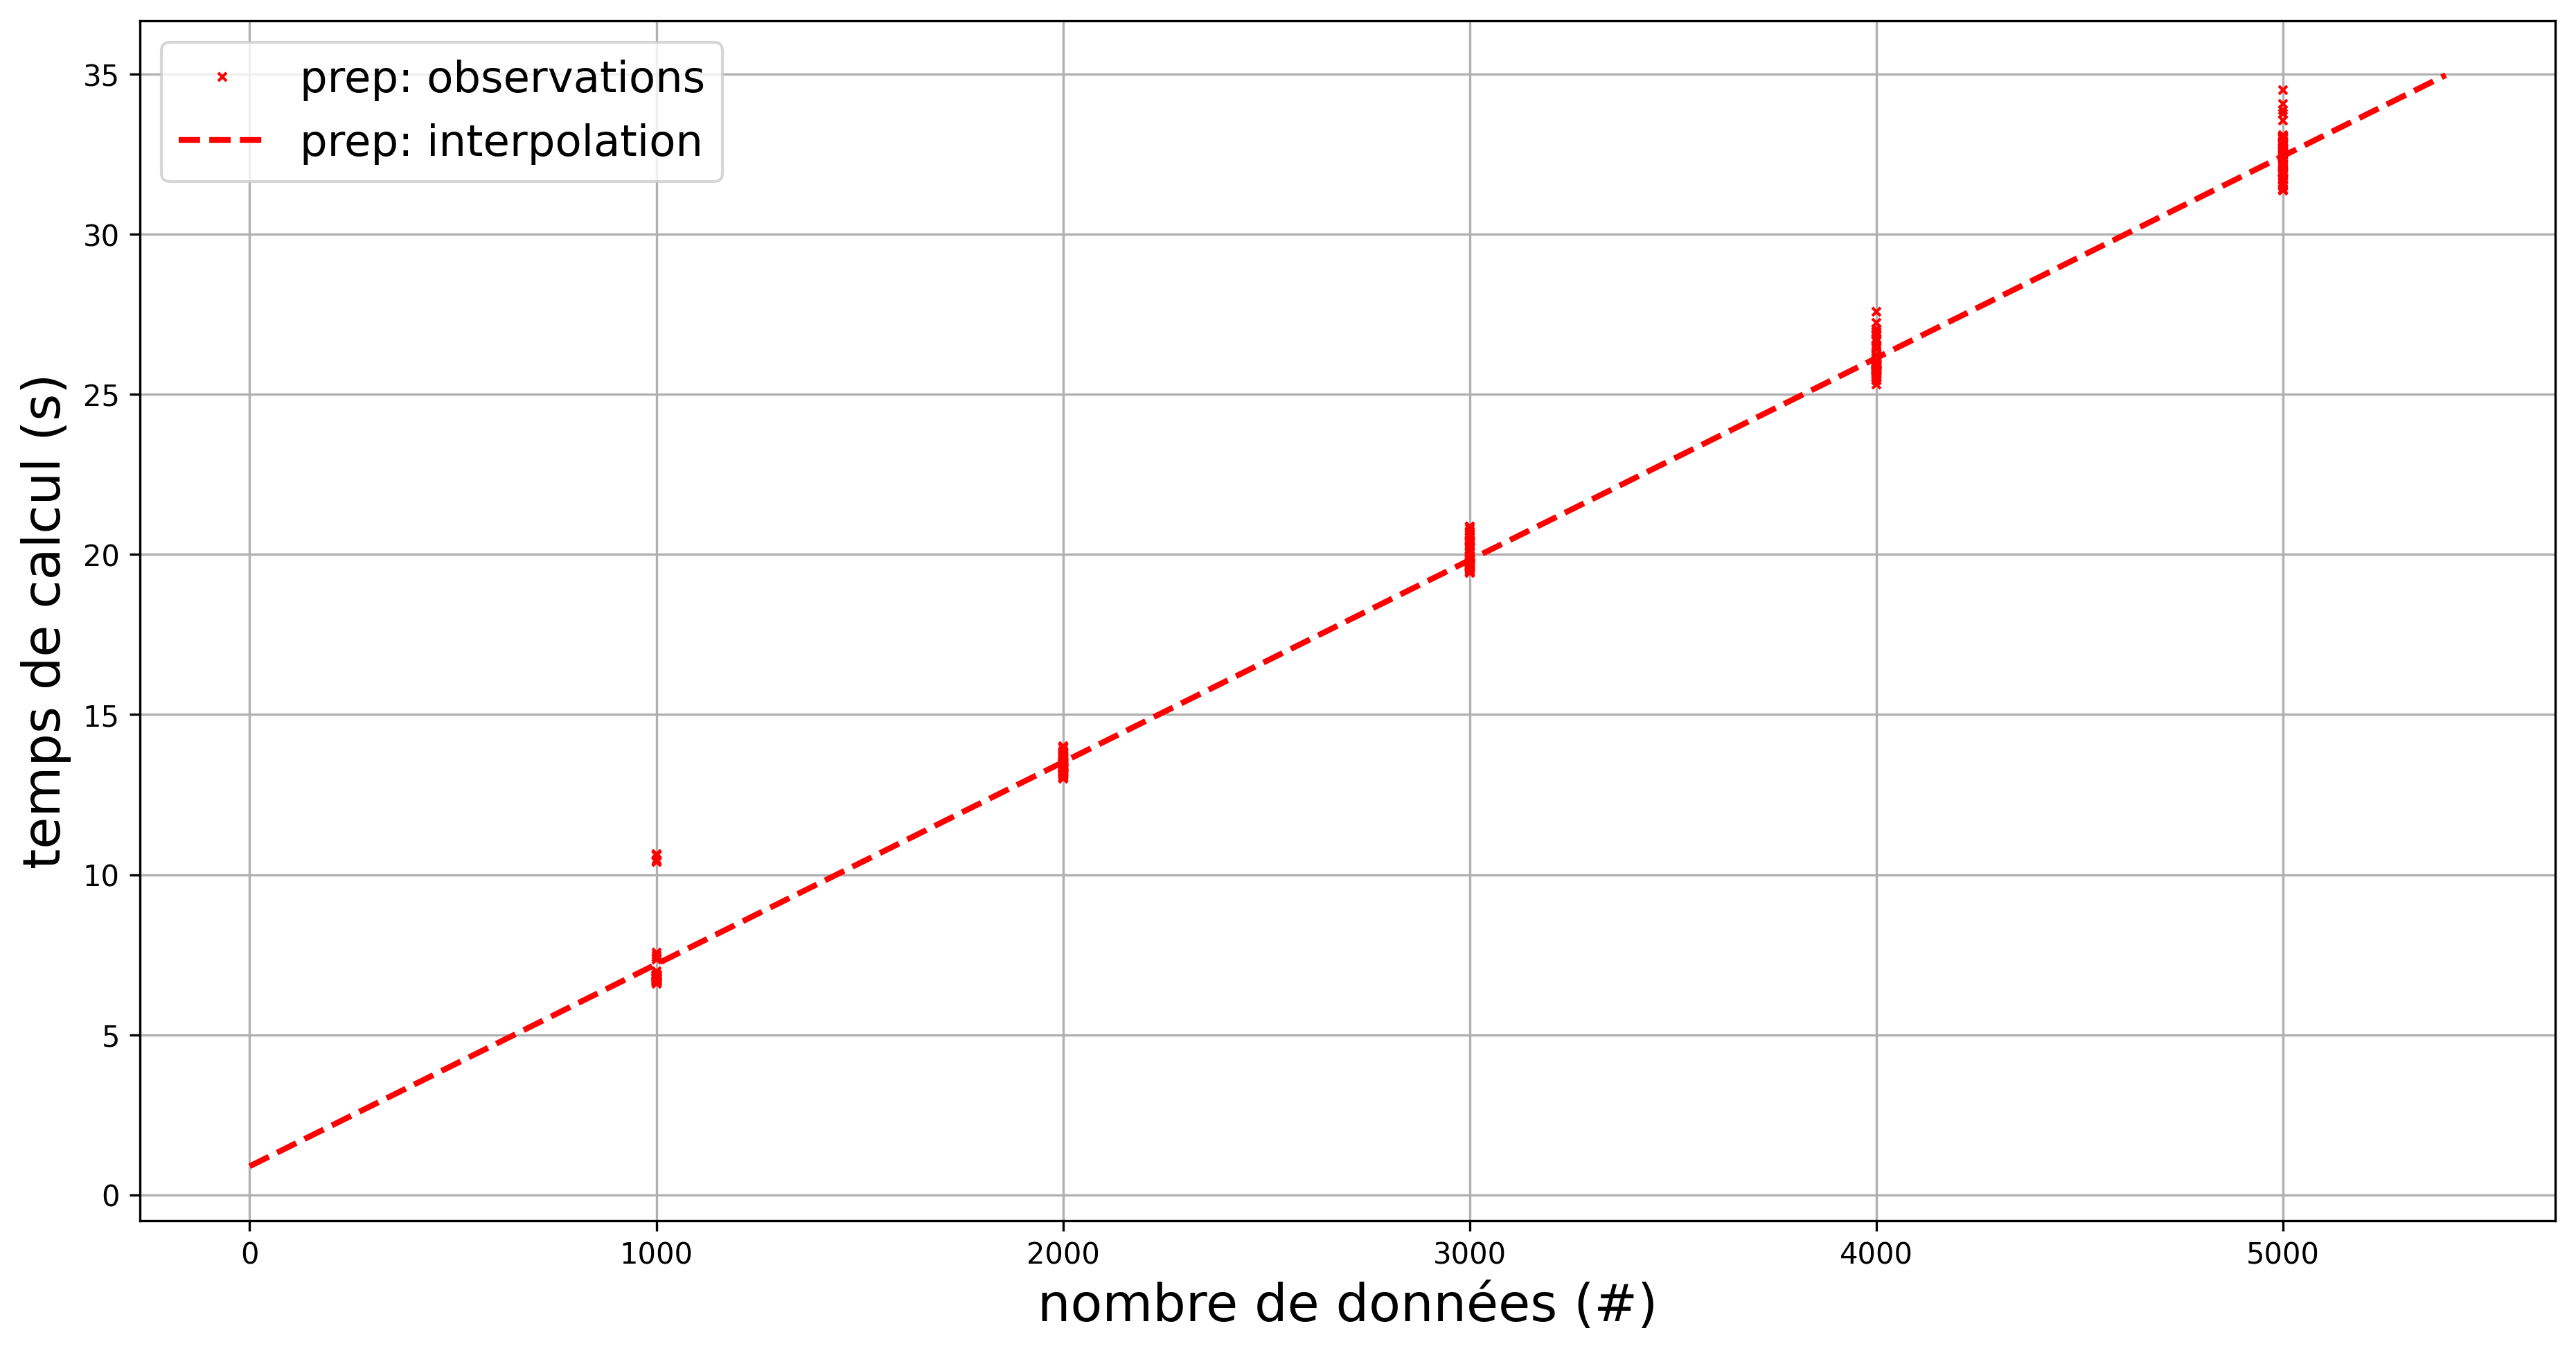

In [5]:
# Create a new figure.
fig_plot_preprocessing: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_preprocessing = fig_plot_preprocessing.gca()

# Plot computation time for preprocessing.
axis_plot_preprocessing.plot(
    df_preprocessing["dataset_size"],  # x
    df_preprocessing["time_total"],  # y
    label="prep: observations",
    marker="x",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=0,
    linestyle="",
)
axis_plot_preprocessing.plot(
    range(0, 5500, 100),  # x
    interpolation_prep(range(0, 5500, 100)),  # y
    label="prep: interpolation",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)

# Set axis name.
axis_plot_preprocessing.set_xlabel("nombre de données (#)", fontsize=18,)
axis_plot_preprocessing.set_ylabel("temps de calcul (s)", fontsize=18,)

# Plot the legend.
axis_plot_preprocessing.legend(fontsize=15,)

# Plot the grid.
axis_plot_preprocessing.grid(True)

----------

## 2.2. ANALYSIS FOR VECTORIZATION

> - algorithms: `tfidf`, `spacy`
> - factors: `dataset_size`

In [6]:
df_vectorization = pd.read_csv("../results/experiments_synthesis_for_vectorization.csv", sep=";")
df_vectorization["time_total"] = df_vectorization["time_total"].str.replace(",", ".").astype(float)
df_vectorization.head()

,Unnamed: 0,dataset_name,dataset_size,dataset_random_seed,algorithm_name,algorithm_random_seed,time_start,time_stop,time_total
0,../experiments/vectorization/bank_cards_v2-siz...,bank_cards_v2,1000,1,spacy,1,1668606299,1668606306,6.537537
1,../experiments/vectorization/bank_cards_v2-siz...,bank_cards_v2,1000,1,spacy,2,1668606299,1668606305,5.808981
2,../experiments/vectorization/bank_cards_v2-siz...,bank_cards_v2,1000,1,spacy,3,1668606299,1668606305,5.677907
3,../experiments/vectorization/bank_cards_v2-siz...,bank_cards_v2,1000,1,spacy,4,1668606300,1668606306,6.582016
4,../experiments/vectorization/bank_cards_v2-siz...,bank_cards_v2,1000,1,spacy,5,1668606306,1668606312,6.184443


Ordinary Least Squares model

to dertermine if vectorization computation time is `algorithm_name` dependant.

In [7]:
# Fit the model to the data and print results.
model_vect_ALGONAME = smf.ols(
    formula="time_total ~ C(algorithm_name)",
    data=df_vectorization,
)
results_vect_ALGONAME = model_vect_ALGONAME.fit()
print(results_vect_ALGONAME.summary())

                            OLS Regression Results                            
Dep. Variable:             time_total   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     689.6
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           1.42e-73
Time:                        09:20:38   Log-Likelihood:                -712.21
No. Observations:                 250   AIC:                             1428.
Df Residuals:                     248   BIC:                             1435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Ordinary Least Squares model

one computation time model for `tfidf` vectorization `algorithm_name`.

In [8]:
# Fit the model to the data and print results.
model_vect_tfidf = smf.ols(
    formula="time_total ~ dataset_size",
    data=df_vectorization[df_vectorization["algorithm_name"]=="tfidf"],
)
results_vect_tfidf = model_vect_tfidf.fit()
print(results_vect_tfidf.summary())
print()
print(">> R²: {0}".format(round(results_vect_tfidf.rsquared,3)))
print(">> R: {0} ( low~0.2, medium~0.5, strong~0.8 )".format(round(np.sqrt(results_vect_tfidf.rsquared),3)))

# Define the interpolation function.
def interpolation_vect_tfidf(dataset_size) -> float:
    res: float = 0
    if results_vect_tfidf.pvalues["Intercept"] < 0.05:
        res += results_vect_tfidf.params["Intercept"]
    if results_vect_tfidf.pvalues["dataset_size"] < 0.05:
        res += results_vect_tfidf.params["dataset_size"] * dataset_size
    return res

                            OLS Regression Results                            
Dep. Variable:             time_total   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2545.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           4.79e-84
Time:                        09:20:39   Log-Likelihood:                 262.36
No. Observations:                 125   AIC:                            -520.7
Df Residuals:                     123   BIC:                            -515.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0140      0.006     -2.228   

Ordinary Least Squares model

one computation time model for `frcorenewsmd` vectorization `algorithm_name`.

In [9]:
# Fit the model to the data and print results.
model_vect_frcorenewsmd = smf.ols(
    formula="time_total ~ dataset_size",
    data=df_vectorization[df_vectorization["algorithm_name"]=="spacy"],
)
results_vect_frcorenewsmd = model_vect_frcorenewsmd.fit()
print(results_vect_frcorenewsmd.summary())
print()
print(">> R²: {0}".format(round(results_vect_frcorenewsmd.rsquared,3)))
print(">> R: {0} ( low~0.2, medium~0.5, strong~0.8 )".format(round(np.sqrt(results_vect_frcorenewsmd.rsquared),3)))

# Define the interpolation function.
def interpolation_vect_frcorenewsmd(dataset_size) -> float:
    res: float = 0
    if results_vect_frcorenewsmd.pvalues["Intercept"] < 0.05:
        res += results_vect_frcorenewsmd.params["Intercept"]
    if results_vect_frcorenewsmd.pvalues["dataset_size"] < 0.05:
        res += results_vect_frcorenewsmd.params["dataset_size"] * dataset_size
    return res

                            OLS Regression Results                            
Dep. Variable:             time_total   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     3568.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           1.03e-92
Time:                        09:20:40   Log-Likelihood:                -186.80
No. Observations:                 125   AIC:                             377.6
Df Residuals:                     123   BIC:                             383.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8862      0.228      8.271   

Print vectorization computation time model.

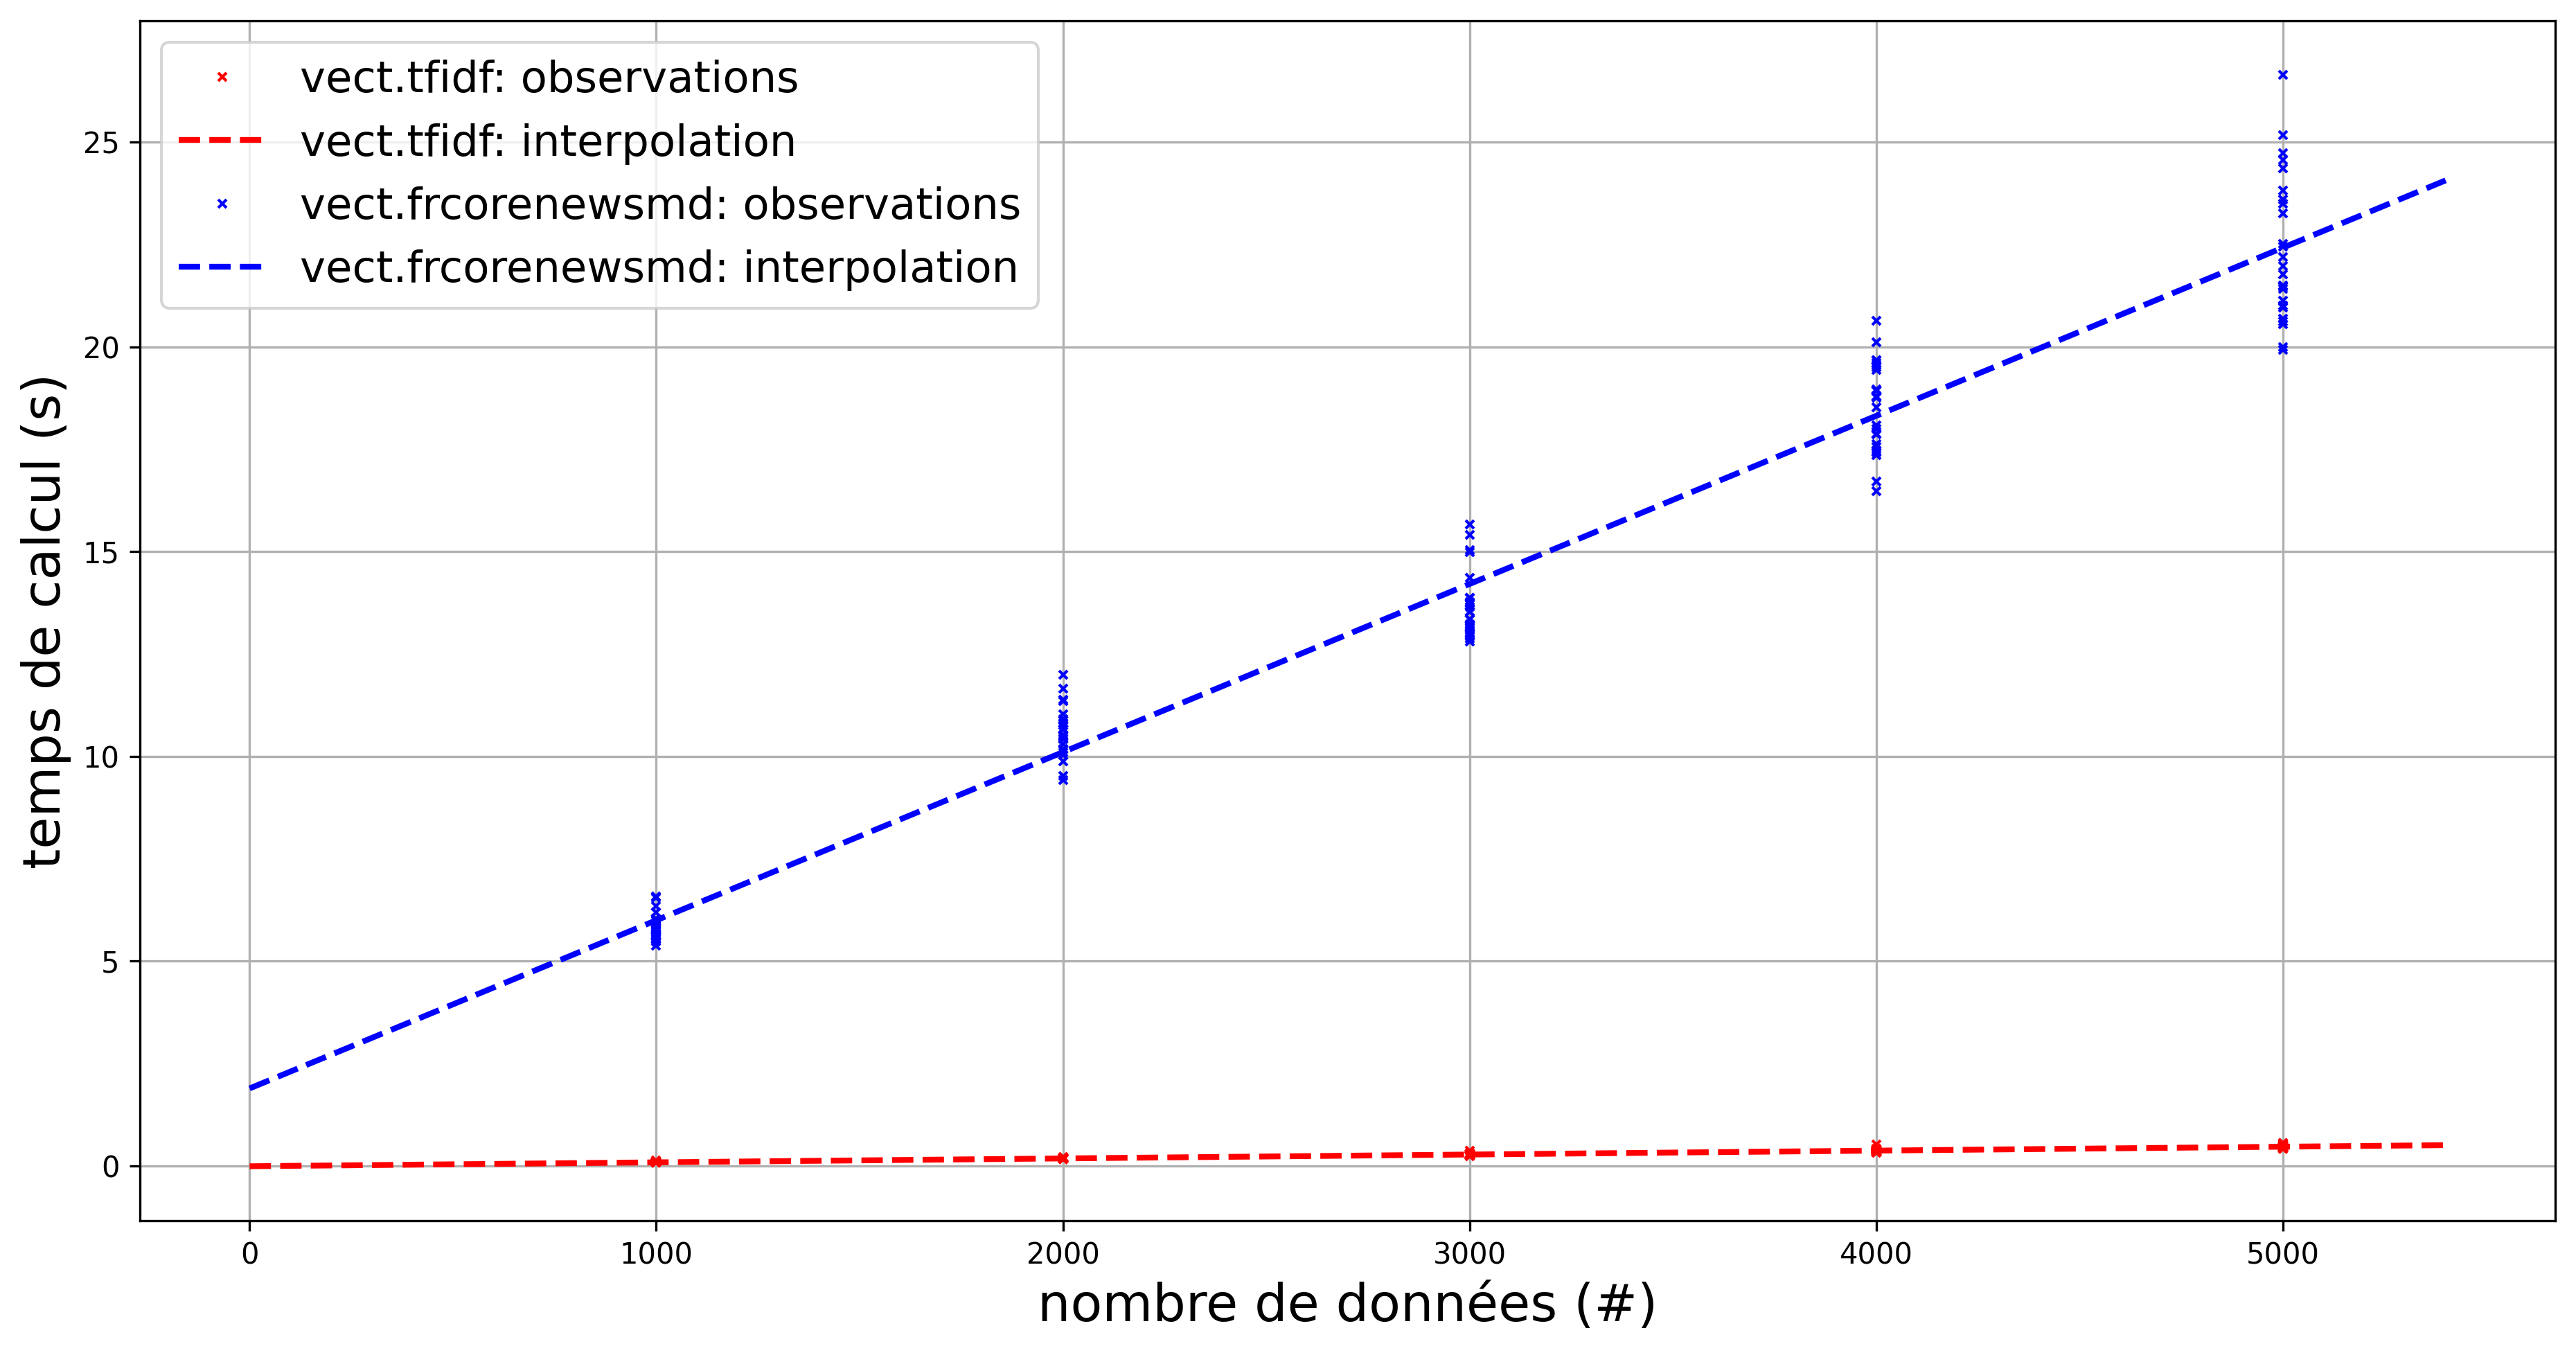

In [10]:
# Create a new figure.
fig_plot_vectorization: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
axis_plot_vectorization = fig_plot_vectorization.gca()

# Plot computation time for tfidf.
axis_plot_vectorization.plot(
    df_vectorization[df_vectorization["algorithm_name"]=="tfidf"]["dataset_size"],  # x
    df_vectorization[df_vectorization["algorithm_name"]=="tfidf"]["time_total"],  # y
    label="vect.tfidf: observations",
    marker="x",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=0,
    linestyle="",
)
axis_plot_vectorization.plot(
    range(0, 5500, 100),  # x
    interpolation_vect_tfidf(range(0, 5500, 100)),  # y
    label="vect.tfidf: interpolation",
    marker="",
    markerfacecolor="red",
    markersize=3,
    color="red",
    linewidth=2,
    linestyle="--",
)

# Plot computation time for frcorenewsmd.
axis_plot_vectorization.plot(
    df_vectorization[df_vectorization["algorithm_name"]=="spacy"]["dataset_size"],  # x
    df_vectorization[df_vectorization["algorithm_name"]=="spacy"]["time_total"],  # y
    label="vect.frcorenewsmd: observations",
    marker="x",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=0,
    linestyle="",
)
axis_plot_vectorization.plot(
    range(0, 5500, 100),  # x
    interpolation_vect_frcorenewsmd(range(0, 5500, 100)),  # y
    label="vect.frcorenewsmd: interpolation",
    marker="",
    markerfacecolor="blue",
    markersize=3,
    color="blue",
    linewidth=2,
    linestyle="--",
)

# Set axis name.
axis_plot_vectorization.set_xlabel("nombre de données (#)", fontsize=18,)
axis_plot_vectorization.set_ylabel("temps de calcul (s)", fontsize=18,)

# Plot the legend.
axis_plot_vectorization.legend(fontsize=15,)

# Plot the grid.
axis_plot_vectorization.grid(True)

----------

## 2.3. ANALYSIS FOR CLUSTERING

> - algorithms: `kmeans_COP`, `hier_single`, `hier_complete`, `hier_average`, `hier_ward`, `spectral_SPEC`
> - factors: `dataset_size`, `previous_nb_constraints`, `algorithm_nb_clusters`

In [11]:
df_clustering = pd.read_csv("../results/experiments_synthesis_for_clustering.csv", sep=";")
df_clustering["time_total"] = df_clustering["time_total"].str.replace(",", ".").astype(float)
df_clustering.head()

,Unnamed: 0,dataset_name,dataset_size,dataset_random_seed,previous_nb_constraints,algorithm_name,algorithm_random_seed,algorithm_nb_clusters,time_start,time_stop,time_total
0,../experiments/clustering/bank_cards_v2-size_1...,bank_cards_v2,1000,1,0,hier_average,1,10,1669766342,1669767048,706.108339
1,../experiments/clustering/bank_cards_v2-size_1...,bank_cards_v2,1000,1,1000,hier_average,1,10,1669767302,1669767777,474.837071
2,../experiments/clustering/bank_cards_v2-size_1...,bank_cards_v2,1000,1,1500,hier_average,1,10,1669767733,1669768149,416.317765
3,../experiments/clustering/bank_cards_v2-size_1...,bank_cards_v2,1000,1,2000,hier_average,1,10,1669768104,1669768487,382.944872
4,../experiments/clustering/bank_cards_v2-size_1...,bank_cards_v2,1000,1,2500,hier_average,1,10,1669768454,1669768777,322.408471


Ordinary Least Squares model

to dertermine if clustering computation time is `algorithm_name` dependant.

In [74]:
# Fit the model to the data and print results.
model_clust_ALGONAME = smf.ols(
    formula="time_total ~ C(algorithm_name)",
    data=df_clustering,
)
results_clust_ALGONAME = model_clust_ALGONAME.fit()
print(results_clust_ALGONAME.summary())

                            OLS Regression Results                            
Dep. Variable:             time_total   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     2553.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:26:54   Log-Likelihood:            -4.8568e+05
No. Observations:               54340   AIC:                         9.714e+05
Df Residuals:                   54334   BIC:                         9.714e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Ordinary Least Squares model

one computation time model for `kmeans_COP` clustering `algorithm_name`.

In [51]:
# Fit the model to the data and print results.
model_clust_kmeans_COP = smf.ols(
    formula="time_total ~ dataset_size",
    #formula="time_total ~ np.power(dataset_size,2)",
    #formula="time_total ~ np.power(dataset_size,3)",
    #formula="time_total ~ previous_nb_constraints",
    #formula="time_total ~ np.power(previous_nb_constraints,2)",
    #formula="time_total ~ np.power(previous_nb_constraints,3)",
    #formula="time_total ~ algorithm_nb_clusters",
    #formula="time_total ~ np.power(algorithm_nb_clusters,2)",
    #formula="time_total ~ np.power(algorithm_nb_clusters,3)",
    data=df_clustering[df_clustering["algorithm_name"]=="kmeans_COP"],
)
results_clust_kmeans_COP = model_clust_kmeans_COP.fit()
print(results_clust_kmeans_COP.summary())

                            OLS Regression Results                            
Dep. Variable:             time_total   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 3.223e+04
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:11:42   Log-Likelihood:                -91976.
No. Observations:               13750   AIC:                         1.840e+05
Df Residuals:                   13748   BIC:                         1.840e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -239.6286      3.890    -61.608   

Ordinary Least Squares model

one computation time model for `hier_single` clustering `algorithm_name`.

Ordinary Least Squares model

one computation time model for `hier_complete` clustering `algorithm_name`.

Ordinary Least Squares model

one computation time model for `hier_average` clustering `algorithm_name`.

Ordinary Least Squares model

one computation time model for `hier_ward` clustering `algorithm_name`.

Ordinary Least Squares model

one computation time model for `spectral_SPEC` clustering `algorithm_name`.

Print clustering computation time model.

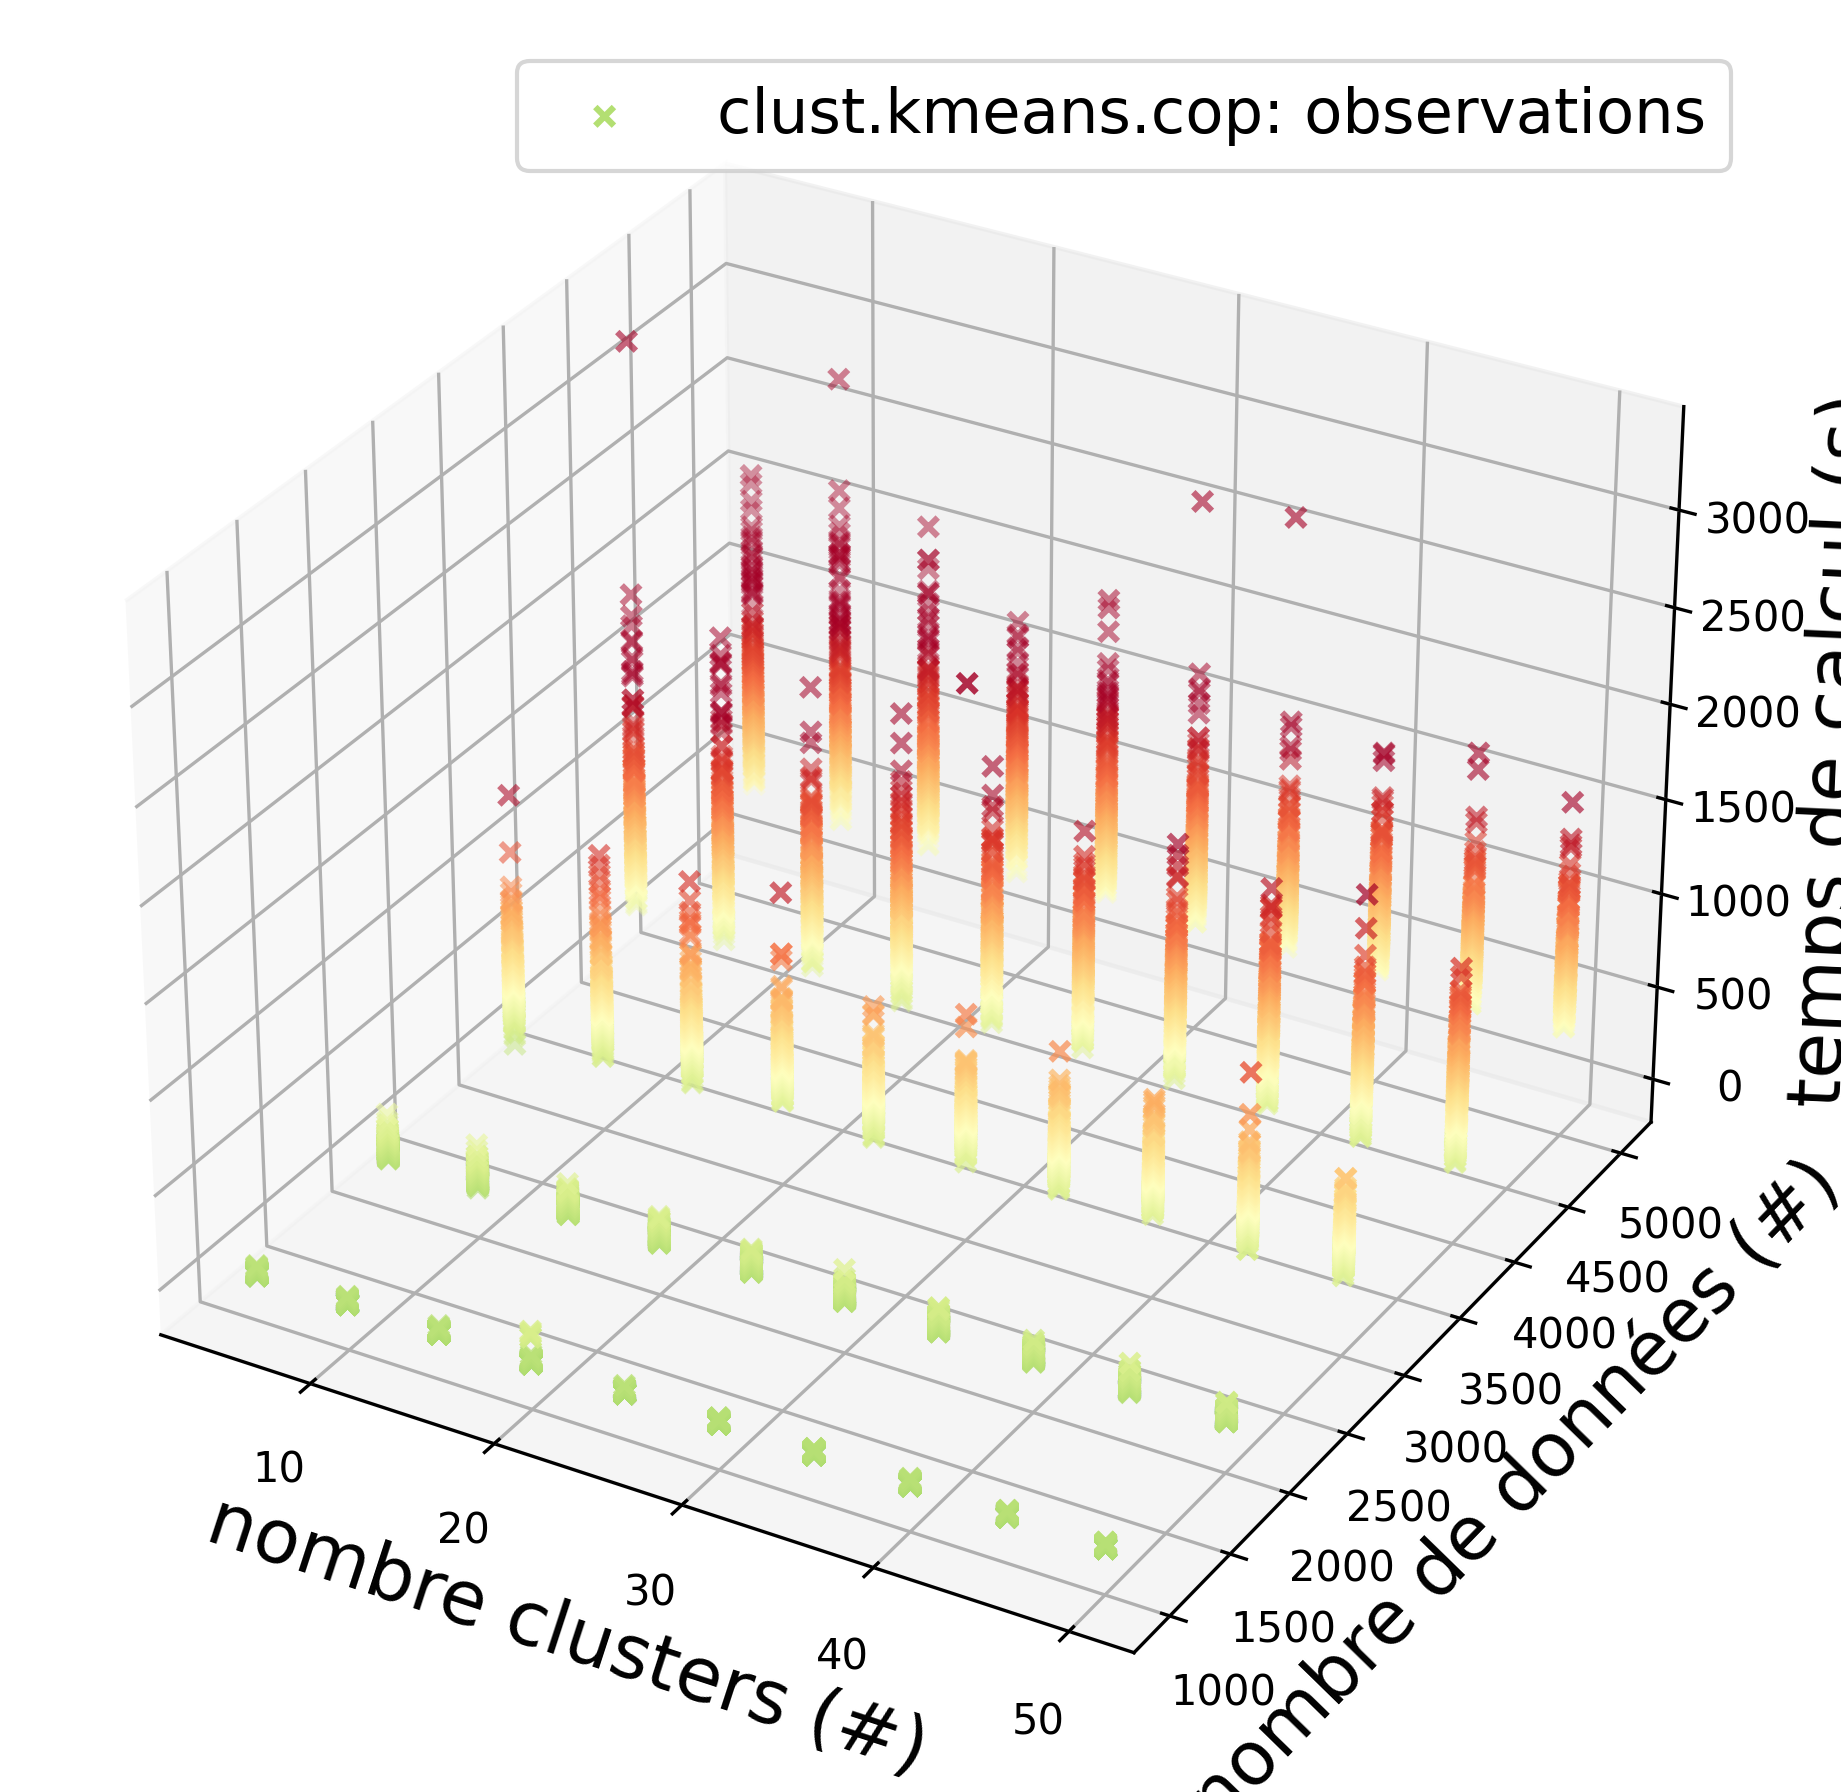

In [12]:
# Create a new figure.
fig: Figure = plt.figure(figsize=(15, 7.5), dpi=300)
ax = fig.add_subplot(projection='3d')

# Plot computation time for kmeans.
mean_time_kmeans_COP = np.mean(df_clustering[df_clustering["algorithm_name"]=="kmeans_COP"]["time_total"])
std_time_kmeans_COP = statistics.stdev(df_clustering[df_clustering["algorithm_name"]=="kmeans_COP"]["time_total"])
ax.scatter(
    df_clustering[df_clustering["algorithm_name"]=="kmeans_COP"]["algorithm_nb_clusters"],  # x
    #df_clustering[df_clustering["algorithm_name"]=="kmeans_COP"]["previous_nb_constraints"],  # x
    df_clustering[df_clustering["algorithm_name"]=="kmeans_COP"]["dataset_size"],  # y
    df_clustering[df_clustering["algorithm_name"]=="kmeans_COP"]["time_total"],  # z
    label="clust.kmeans.cop: observations",
    marker="x",
    c=cm.RdYlGn(
        Normalize(
            vmin=-(mean_time_kmeans_COP + 3*std_time_kmeans_COP),
            vmax=-(mean_time_kmeans_COP - 3*std_time_kmeans_COP),
            clip=True,
        )(-df_clustering[df_clustering["algorithm_name"]=="kmeans_COP"]["time_total"])
    )
)

# Set axis name.
#ax.set_ylabel("nombre contraintes (#)", fontsize=18,)
ax.set_xlabel("nombre clusters (#)", fontsize=18,)
ax.set_ylabel("nombre de données (#)", fontsize=18,)
ax.set_zlabel("temps de calcul (s)", fontsize=18,)

# Plot the legend.
ax.legend(fontsize=15,)

# Plot the grid.
ax.grid(True)

----------

## 2.4. ANALYSIS FOR SAMPLING

> - algorithms: `random`, `in_same`, `farthest`, `closest`
> - factors: `dataset_size`, `previous_nb_constraints`, `previous_nb_clusters`, `algorithm_nb_to_select`

In [76]:
df_sampling = pd.read_csv("../results/experiments_synthesis_for_sampling.csv", sep=";")
df_sampling["time_total"] = df_sampling["time_total"].str.replace(",", ".").astype(float)
df_sampling.head()

,Unnamed: 0,dataset_name,dataset_size,dataset_random_seed,previous_nb_constraints,previous_nb_clusters,algorithm_name,algorithm_random_seed,algorithm_nb_to_select,time_start,time_stop,time_total
0,../experiments/sampling/bank_cards_v2-size_100...,bank_cards_v2,1000,1,0,10,closest,1,100,1668608444,1668608445,1.140008
1,../experiments/sampling/bank_cards_v2-size_100...,bank_cards_v2,1000,1,0,20,closest,1,100,1668608471,1668608472,1.220560
2,../experiments/sampling/bank_cards_v2-size_100...,bank_cards_v2,1000,1,0,30,closest,1,100,1668608496,1668608497,1.208447
3,../experiments/sampling/bank_cards_v2-size_100...,bank_cards_v2,1000,1,0,40,closest,1,100,1668608525,1668608526,1.234345
4,../experiments/sampling/bank_cards_v2-size_100...,bank_cards_v2,1000,1,0,50,closest,1,100,1668608548,1668608549,1.198265


Ordinary Least Squares model

to dertermine if sampling computation time is `algorithm_name` dependant.

In [77]:
# Fit the model to the data and print results.
model_samp_ALGONAME = smf.ols(
    formula="time_total ~ C(algorithm_name)",
    data=df_sampling,
)
results_samp_ALGONAME = model_samp_ALGONAME.fit()
print(results_samp_ALGONAME.summary())

                            OLS Regression Results                            
Dep. Variable:             time_total   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                 1.861e+04
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:28:25   Log-Likelihood:            -4.7706e+05
No. Observations:              137500   AIC:                         9.541e+05
Df Residuals:                  137496   BIC:                         9.542e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Ordinary Least Squares model

one computation time model for `random` sampling `algorithm_name`.

In [82]:
# Fit the model to the data and print results.
model_samp_random_full = smf.ols(
    formula="time_total ~ dataset_size",
    #formula="time_total ~ np.power(dataset_size,2)",
    #formula="time_total ~ np.power(dataset_size,3)",
    #formula="time_total ~ previous_nb_constraints",
    #formula="time_total ~ np.power(previous_nb_constraints,2)",
    #formula="time_total ~ np.power(previous_nb_constraints,3)",
    #formula="time_total ~ previous_nb_clusters",
    #formula="time_total ~ np.power(previous_nb_clusters,2)",
    #formula="time_total ~ np.power(previous_nb_clusters,3)",
    #formula="time_total ~ algorithm_nb_to_select",
    #formula="time_total ~ np.power(algorithm_nb_to_select,2)",
    #formula="time_total ~ np.power(algorithm_nb_to_select,3)",
    data=df_sampling[df_sampling["algorithm_name"]=="random"],
)
results_samp_random_full = model_samp_random_full.fit()
print(results_samp_random_full.summary())

                            OLS Regression Results                            
Dep. Variable:             time_total   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     54.52
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.57e-13
Time:                        18:39:25   Log-Likelihood:            -1.1744e+05
No. Observations:               34375   AIC:                         2.349e+05
Df Residuals:                   34373   BIC:                         2.349e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Ordinary Least Squares model

one computation time model for `random_in_same` sampling `algorithm_name`.

Ordinary Least Squares model

one computation time model for `farthest` sampling `algorithm_name`.

Ordinary Least Squares model

one computation time model for `closest` sampling `algorithm_name`.